<a href="https://colab.research.google.com/github/eunji-data/DX_seminar_201005/blob/master/FCN%EC%8B%A4%EC%8A%B5%EC%98%88%EC%A0%9C_fashionmnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fashion MNIST Classification 문제

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


### 패션 MNIST 데이터셋 로드

load_data() 함수를 호출해서 Fashion MNIST 로딩 : 네 개의 넘파이(NumPy) 배열이 반환

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [ ]:
train_images.shape #훈련세트에 60,000개의 이미지가 있고 각 이미지의 크기는 28x28

(60000, 28, 28)

In [ ]:
train_images[0][14]

array([  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
       226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
        77,   0], dtype=uint8)

In [ ]:
len(train_labels) #훈련세트에는 60,000개의 레이블이 있음

60000

In [ ]:
train_labels #각 레이블은 0과 9사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape #테스트 세트에 10,000개의 이미지가 있고, 이미지의 크기는 28x28

(10000, 28, 28)

In [ ]:
len(test_labels) #테스트 세트에는 10,000개의 레이블이 있음

10000

### 데이터 전처리



픽셀값의 범위가 0~255 사이



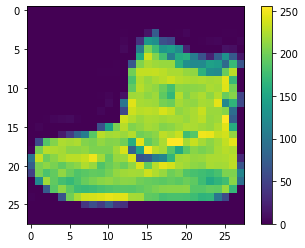

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

픽셀 값을 [0,255]에서 [0,1]로 조정

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Traning Set 25개 이미지, 클래스 이름 출력

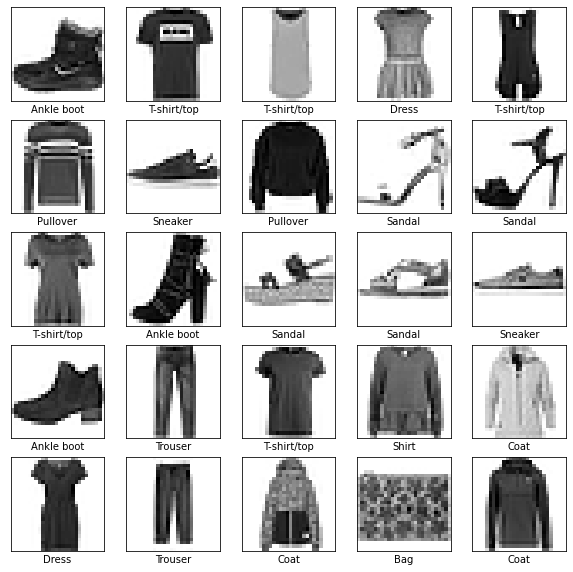

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성

`tf.keras.layers.Dense`함수를 이용해서 Fully Connected Layer를 구성해 보시오.

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5029 - accuracy: 0.8229
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3716 - accuracy: 0.8657
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3356 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8921


### 테스트 성능 측정 (정확도)

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3566 - accuracy: 0.8696

테스트 정확도: 0.8695999979972839


### 예측 만들기

In [ ]:
predictions = model.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

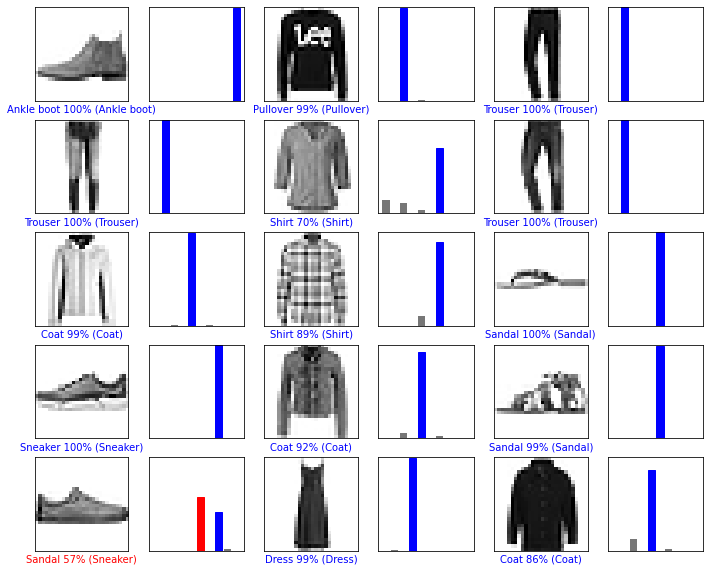

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()